<a href="https://colab.research.google.com/github/bmamba08/Play-Store-App-review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store app data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for category, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [58]:
# Importing libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from PIL import Image
import seaborn as sns
import numpy as np
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Play store dataset, User reviews dataset.

In [60]:
#using pandas library and 'read_csv' function to read App_data file and User_review file
df_app_data = pd.read_csv('/content/Play Store Data.csv')
df_user_review = pd.read_csv('/content/User Reviews.csv')

# Introduction to Data

In [61]:
df_app_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Understanding Play Store Dataset.
Firstly let's get to know data by using Pandas library.





In [62]:
# Checking the info of App_data file
df_app_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [63]:
# Checking the info of the User_review file
df_user_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


# Exploring,Wrangling and Cleaning Data

In [64]:
df_app_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_app_data.shape

(10841, 13)

In [66]:
df_app_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [67]:
#To check & count the null values in all columns
df_app_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [68]:
# To replace the null values with zero in Rating column
df_app_data.fillna({'Rating': 0}, inplace = True)

In [69]:
df_app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [70]:
df_app_data[df_app_data['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [71]:
df_app_data.loc[10472] = df_app_data.loc[10472].shift()
df_app_data['App'].loc[10472] = df_app_data['Category'].loc[10472]
df_app_data['Category'].loc[10472] = np.nan
df_app_data.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [72]:
df_app_data.dtypes

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

Data type of Rating is object. If we convert from string to numeric, we can make our analysis easy.

In [73]:
df_app_data['Rating'] = pd.to_numeric(df_app_data['Rating'])
df_app_data['Rating'].dtype

dtype('float64')

Similarly, we can change other columns data-types according to the values it contains.

In [74]:
df_app_data['Reviews'] =df_app_data['Reviews'].astype(float)
df_app_data['Reviews'].dtype


dtype('float64')

In [75]:
df_app_data['Installs'] = df_app_data.Installs.str.replace(",","")
df_app_data['Installs'] = df_app_data.Installs.str.replace("+","")
df_app_data['Installs'] = df_app_data['Installs'].astype(float)
df_app_data['Installs'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [76]:
df_app_data['Size'] = df_app_data.Size.replace("Varies with device",np.nan)

In [77]:
#let's proceed with examing some interesting categorical unique values

#examining the unique values of n_group as this column will appear very handy for later analysis
df_app_data.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

In [78]:
df_app_data.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


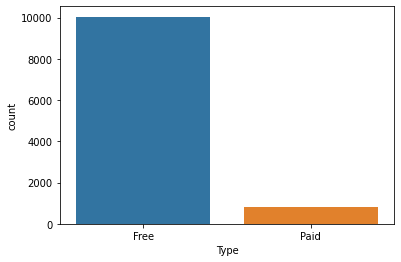

In [79]:
sns.countplot(df_app_data.Type)

In [80]:
df_app_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [81]:
df_app_data.rename(columns={'Price':'Price($)'},inplace=True)

In [82]:
df_app_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price($)', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [83]:
df_app_data['Price($)'] = df_app_data['Price($)'].str.replace("$","")
df_app_data['Price($)'] = df_app_data['Price($)'].str.replace("nan","0.0")
df_app_data['Price($)'] = pd.to_numeric(df_app_data['Price($)']) 
df_app_data['Price($)'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('float64')

In [84]:
df_app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [85]:
df_app_data[df_app_data['Content Rating']== 'Unrated'] = np.nan

In [86]:
df_app_data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', nan], dtype=object)

In [87]:
df_app_data['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

# Visualizing Data

Exploring the data by analyzing its statistics and visualizing the values of features and correlations between different features. Explaining the process and the results.

### (1). Unique number of Categories in the Play Store apps dataset.

In [88]:
# Exploring and analyzing different number of Categories in Apps Data.
diff_category = df_app_data.Category.value_counts().reset_index().rename(columns={'index':'Category','Category':'Counts'})
diff_category

,Category,Counts
0,FAMILY,1971
1,GAME,1144
2,TOOLS,842
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


### (2). Top 5 Categories with respect to the number of app counts.

In [89]:
# Here we can see the top 5 Categories using (.head) method.
top_five_categories = diff_category.head()  
top_five_categories

,Category,Counts
0,FAMILY,1971
1,GAME,1144
2,TOOLS,842
3,MEDICAL,463
4,BUSINESS,460


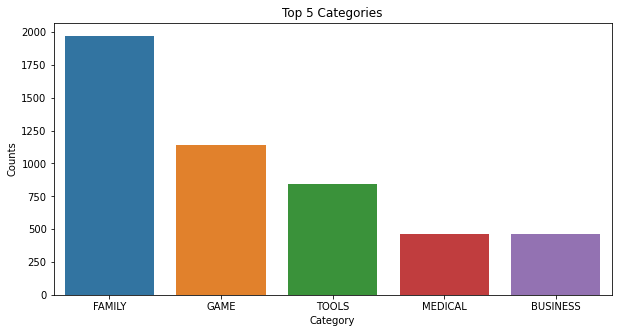

In [90]:
plt.figure(figsize=(10,5))
plt.xlabel("Category")
plt.ylabel("Counts")
plt.title("Top 5 Categories")
sns.barplot(data=top_five_categories,x='Category', y='Counts')


## (3). Number of installed applications for top 20-Categories w.r.t. number of App counts.

In [91]:
category_installs = df_app_data.groupby(['Category'])['Installs'].sum()
top_category_installs = pd.merge(diff_category, category_installs, on='Category')
top_20_category_installs = top_category_installs.head(20)
top_20_category_installs

,Category,Counts,Installs
0,FAMILY,1971,1.025826e+10
1,GAME,1144,3.508602e+10
2,TOOLS,842,1.145272e+10
3,MEDICAL,463,5.325744e+07
4,BUSINESS,460,1.001915e+09
5,PRODUCTIVITY,424,1.417609e+10
6,PERSONALIZATION,392,2.325495e+09
7,COMMUNICATION,387,3.264728e+10
8,SPORTS,384,1.751174e+09
9,LIFESTYLE,382,5.376435e+08


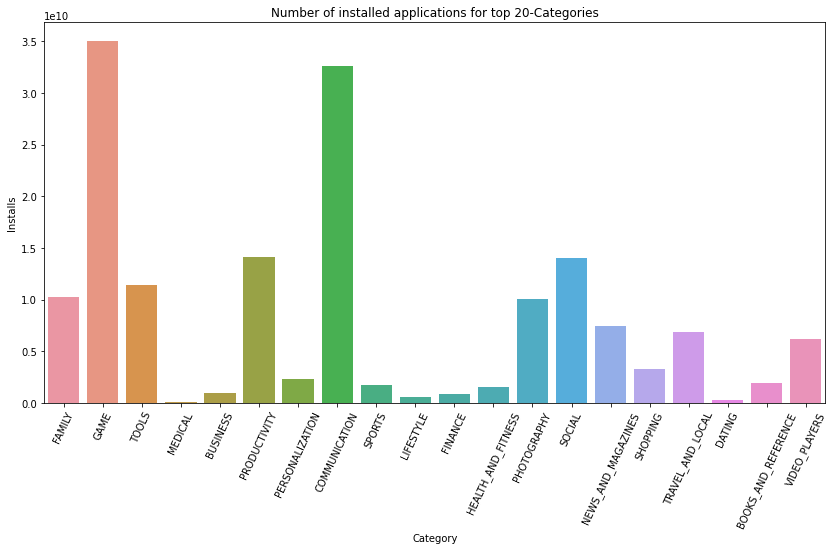

In [92]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for top 20-Categories")
sns.barplot(data=top_20_category_installs,x='Category',y='Installs')
plt.show()

## (4). Number of applications installed for top 20 Genres.

In [93]:
top_genres = df_app_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = df_app_data.groupby(['Genres'])['Installs'].sum()

top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)
top_20_genres_installs

,Genres,Count,Installs
0,Tools,841,1.144272e+10
1,Entertainment,622,5.064214e+09
2,Education,549,5.009101e+08
3,Medical,463,5.325744e+07
4,Business,460,1.001915e+09
5,Productivity,424,1.417609e+10
6,Sports,398,2.867174e+09
7,Personalization,392,2.325495e+09
8,Communication,387,3.264728e+10
9,Lifestyle,381,5.276435e+08


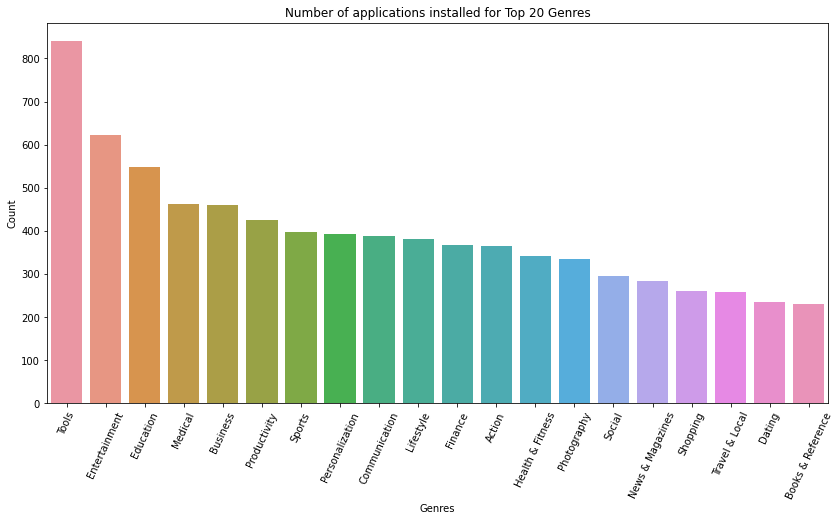

In [94]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Number of applications installed for Top 20 Genres")
sns.barplot(data=top_20_genres_installs,x='Genres',y='Count')
plt.show()

## (5). Calculating average or (mean) price of the paid Apps.

In [95]:
df_app_data['Price($)'].unique() # Unique number of prices

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,    nan,   1.96,  19.4 ,
         3.9 ,   4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,
        28.99,   2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,
         3.61, 394.99,   1.26,   1.2 ,   1.04])

In [96]:
df_app_data[df_app_data['Price($)'] =='nan']

,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [97]:
# Selecting all the paid Apps from the Data.
paid_apps_price =df_app_data.loc[df_app_data['Price($)'] !=0.0,].reset_index()
paid_apps_price


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
1,235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
2,290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6.8M,100000.0,Paid,4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
3,291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39M,100000.0,Paid,4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
4,427,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000.0,Paid,3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,10735,FP VoiceBot,FAMILY,0.0,17.0,157k,100.0,Paid,0.99,Mature 17+,Entertainment,"November 25, 2015",1.2,2.1 and up
798,10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35.0,2.4M,1000.0,Paid,7.99,Everyone,Health & Fitness,"August 8, 2018",1.9.3,4.2 and up
799,10782,Trine 2: Complete Story,GAME,3.8,252.0,11M,10000.0,Paid,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up
800,10785,"sugar, sugar",FAMILY,4.2,1405.0,9.5M,10000.0,Paid,1.20,Everyone,Puzzle,"June 5, 2018",2.7,2.3 and up


###  Average price of all the paid Apps.Calculating 3M's for clear understanding of price distribution of paid Apps.

In [98]:
# Mean price of all the paid Apps.
avg_price = paid_apps_price['Price($)'].mean().round(2)
print(f"Average or mean price of paid Apps is ${avg_price}")

# Median price of all the paid Apps.
med_price =paid_apps_price['Price($)'].median().round(2)
print(f"Median price of paid Apps is ${med_price}")

# Mode of the price of all the paid Apps
mode_price =paid_apps_price['Price($)'].mode().round(2)
print(f"Mode of prices of paid Apps is ${mode_price}")

Average or mean price of paid Apps is $13.92
Median price of paid Apps is $2.99
Mode of prices of paid Apps is $0    0.99
dtype: float64


## (6). Number of Apps associated with different Content Rating.

In [99]:
Unique_content_Rating_type = df_app_data['Content Rating'].value_counts().reset_index().rename(columns={'index':'Content Rating','Content Rating':'Counts'})

In [100]:
diff_content_rated_apps = df_app_data.groupby(['Content Rating'])['App'].sum()

In [101]:
content_rating_viz = pd.merge(Unique_content_Rating_type,diff_content_rated_apps, on='Content Rating')


In [102]:
content_rating_viz

,Content Rating,Counts,App
0,Everyone,8715,Photo Editor & Candy Camera & Grid & ScrapBook...
1,Teen,1208,Sketch - Draw & PaintTattoo Name On My Photo E...
2,Mature 17+,499,"Secrets of beauty, youth and healthDresses Ide..."
3,Everyone 10+,414,Superheroes Wallpapers | 4K BackgroundsPolice ...
4,Adults only 18+,3,Manga Master - Best manga & comic readerDraftK...


In [103]:
content_rated = content_rating_viz['Content Rating']
App_counts = content_rating_viz['Counts']

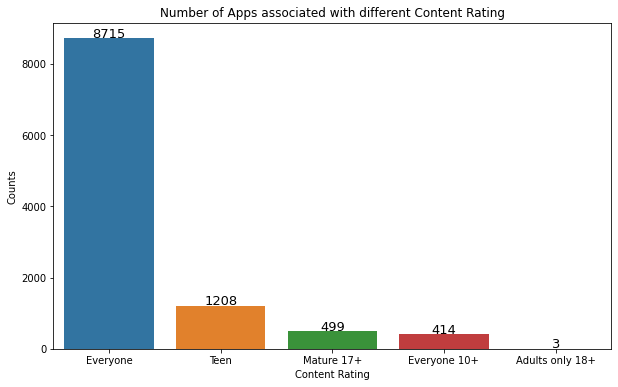

In [104]:
plt.figure(figsize=(10,6))
plt.title("Number of Apps associated with different Content Rating")
sns.barplot(data=content_rating_viz,x = content_rated, y= App_counts)
for index, data in enumerate(App_counts):      # Display the data values over the bars
  plt.text(x=index, y= data+29,s=f"{data}",ha='center', fontsize=13)
plt.show()



#Let's explore another dataset which we have (User Review)

In [105]:
df_user_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [106]:
#To check & count the null values in all columns

df_user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [107]:
# To replace all the null values with zero in Rating column
df_user_review.fillna({'Sentiment_Polarity': 0, 'Sentiment_Subjectivity':0}, inplace = True)

In [108]:
df_user_review.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity            0
Sentiment_Subjectivity        0
dtype: int64

In [109]:
diff_apps = pd.DataFrame(df_user_review['App'].unique())


In [110]:
kindle_review= df_user_review[df_user_review['App']== 'Amazon Kindle']
kindle_review

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
6372,Amazon Kindle,"OK, despite experience could little intuitive,...",Positive,0.251389,0.516667
6373,Amazon Kindle,I like reading alternitive Galaxy Tab S2 basic...,Positive,0.079861,0.459722
6374,Amazon Kindle,I want option remove page flip. Im already irr...,Negative,-0.169141,0.325000
6375,Amazon Kindle,I used LOVE kindle app. Read s7 edge time. Now...,Negative,-0.020000,0.480000
6376,Amazon Kindle,The functional ability Kindle library great me...,Positive,0.140000,0.590000
...,...,...,...,...,...
6507,Amazon Kindle,Great love read,Positive,0.650000,0.675000
6508,Amazon Kindle,NaN,NaN,0.000000,0.000000
6509,Amazon Kindle,WHERE DID DIRECT ACCESS TO ***MY*** UNLIMITED ...,Positive,0.100000,0.400000
6510,Amazon Kindle,NaN,NaN,0.000000,0.000000


## (7). Generate WordCloud for "Amazon Kindle" App from column Translated_Review.

In [111]:
# Generate WordCloud for column Translated_Review

# Text of all words in column Translated_Review
text = " ".join(review for review in df_user_review.Translated_Review.astype(str))
print (f"There are {len(text)} words in the combination of cells in column Translated_Review.")

There are 4382080 words in the combination of cells in column Translated_Review.


In [112]:
# Create stopword list:
# remove words that we want to exclude
stopwords = set(STOPWORDS)
stopwords.update(["nan","game"])


You can use any shape you want with the WorldCloud method in Python.

To create a shape for your WordCloud, first, you need to find a (JPG or png) file to become the mask. Below is a kindle logo that I found on the internet:

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

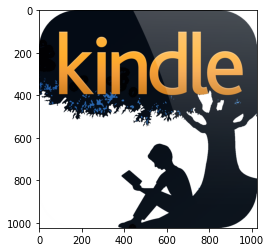

In [113]:
# Loading the image file and converting png image to a numpy array
# Now, let's create a Kindle logo-shaped word cloud for words in column Translated_Review.
kindle_mask = np.array(Image.open('/content/kindle-logo.png'))

# Display the image.
plt.imshow(kindle_mask)
kindle_mask

The way the masking functions works is that it requires all-white part of the mask should be 255. If you use a JPG file then you should get 255 in your array, while PNG file will populate your array with 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Please note that WorldCloud will not work with the PNG image straight away and you will need to transform it in order for it to work correctly.

Although i have used a maskable image here.

kindle_mask array is populated with the 255, so everything is ready for the next stage.

Lets' make a wordcloud with the selected shape. Notice in the WordCloud function, there is a mask argument that takes in the mask that you created from the PNG image above. The contour_width and contour_color are arguments that allow you to adjust the outline characteristics of the cloud.



Now, let's create a Amazon Kindle logo-shaped word cloud for words in column Translated_Review.

you can use any shape you want with the WorldCloud method in Python.

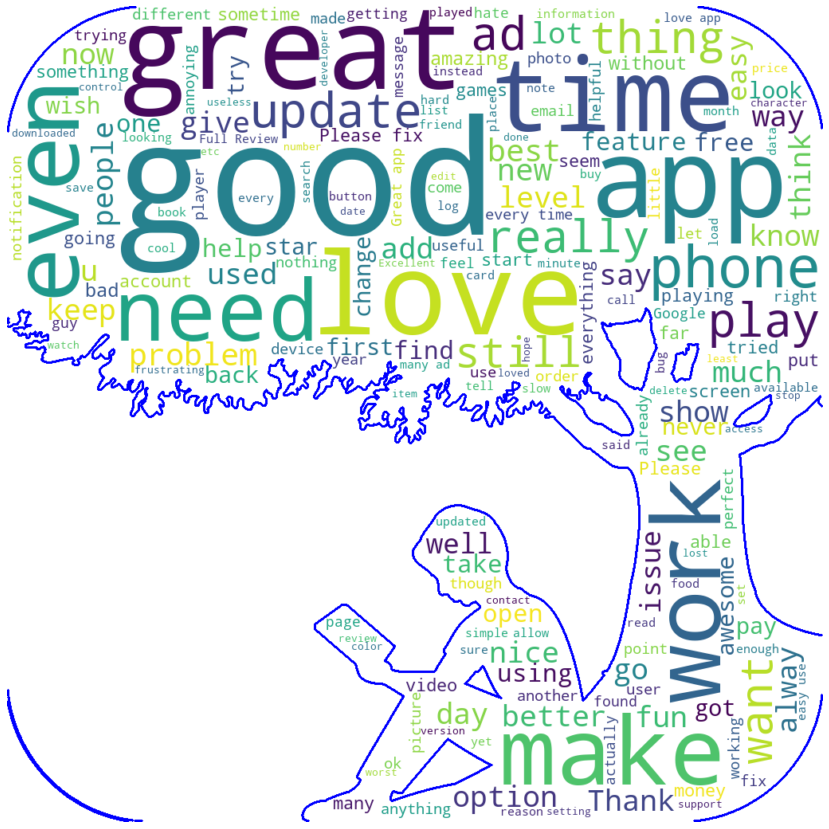

In [114]:
# Now, let's create a Kindle logo-shaped word cloud for words in column Translated_Review.
# Generate a word cloud image
wordcloud = WordCloud(stopwords = stopwords,mask= kindle_mask, background_color ="white",contour_width=3, contour_color='blue').generate(text)

plt.figure(figsize= (20,15))
plt.tight_layout(pad=0)
plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear') #this argument is to make the displayed image appear more smoothly.
plt.show()


# Conclusion

Summarizing our findings, suggesting other features

The PlayStore App and User Review dataset's appeared to be very rich datasets with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found Category that takes good advantage of the PlayStore App and provides the most links; we found that our top Category has a 1971 number of Apps. After that, we proceeded with analyzing Apps that were installed then the runnerup Category stands at 1st position with 3.508602e+10 installs. Next, we see that 842 different Apps were installed for the top Genre(Tools). Further, we see that $(13.92, 2.99, 0.99) are the respective (mean, median, mode) price distribution of paid Apps. Number of Apps present according to content for different category of users, 8175 Apps are there which are available for every type of users and only 3 Apps which are restricted to adults only(18+) users. Coming to the last thing from (User Review) dataset is wordcloud from reviews of the Amazon Kindle App. Overall the EDA displays the overview of necessary features to look for, although this work is a part of group EDA and there are other features too one can do deep analysis for.